In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
pd.set_option('display.max_columns', None)


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score

In [7]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 non-null  float64
 22

#### **Basic EDA**





In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,1
V6,1
V7,1
V8,1
V9,1


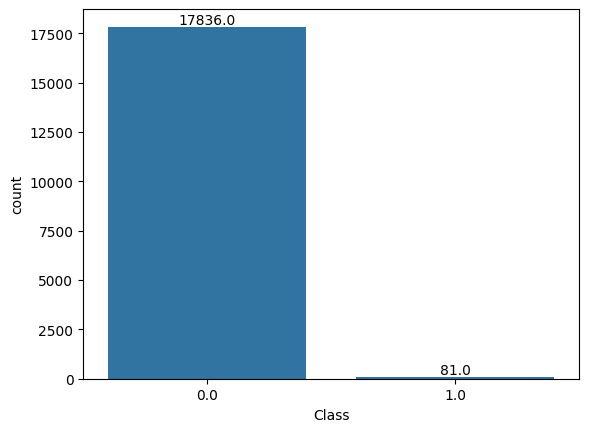

In [11]:


ax = sns.countplot(data=df, x='Class')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.show()

In [12]:
print('The total amount of Non Fraud 0 vs Fraud 1 Cases ', df['Class'].value_counts())
print("The total Percent of Class Distribution ", df['Class'].value_counts(normalize = True))

The total amount of Non Fraud 0 vs Fraud 1 Cases  Class
0.0    17836
1.0       81
Name: count, dtype: int64
The total Percent of Class Distribution  Class
0.0    0.995479
1.0    0.004521
Name: proportion, dtype: float64


RESULT : there are 284315 normal transactions and 492 fraud transaction. The dataset is heavily imbalanced

In [13]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Time,17918.0,13905.276259,9867.916251,0.000000,3781.250000,12347.500000,23775.000000,29031.000000
V1,17918.0,-0.244970,1.893161,-30.552380,-0.959806,-0.306803,1.164015,1.960497
V2,17918.0,0.258166,1.508296,-40.978852,-0.305367,0.235061,0.876538,16.713389
V3,17918.0,0.777804,1.766872,-31.103685,0.338327,0.924255,1.557391,4.101716
V4,17918.0,0.291614,1.479519,-5.172595,-0.629972,0.230058,1.155770,11.927512
V5,17917.0,-0.146329,1.423917,-32.092129,-0.729796,-0.192681,0.347812,34.099309
V6,17917.0,0.099878,1.327756,-23.496714,-0.651820,-0.169764,0.493661,21.393069
V7,17917.0,-0.150970,1.342027,-26.548144,-0.599770,-0.076457,0.447398,34.303177
V8,17917.0,0.012969,1.318460,-23.632502,-0.175261,0.020846,0.272076,20.007208
V9,17917.0,0.734707,1.273597,-7.175097,-0.102798,0.726588,1.480254,10.392889


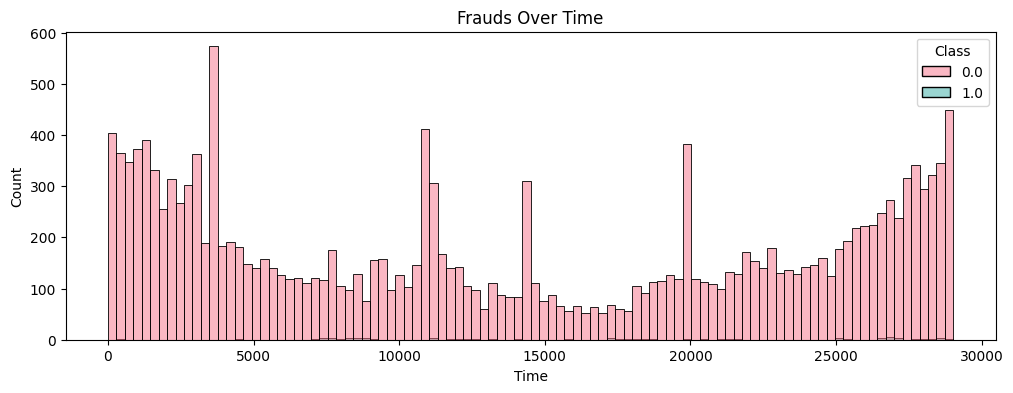

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 4))
sns.histplot(data=df, x='Time', hue='Class', bins=100, palette='husl')

plt.title("Frauds Over Time")
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()




In [15]:
df['Class'].unique()

array([ 0.,  1., nan])

Text(0.5, 1.0, 'Correlation Matrix for Credit Card Fraud Detection')

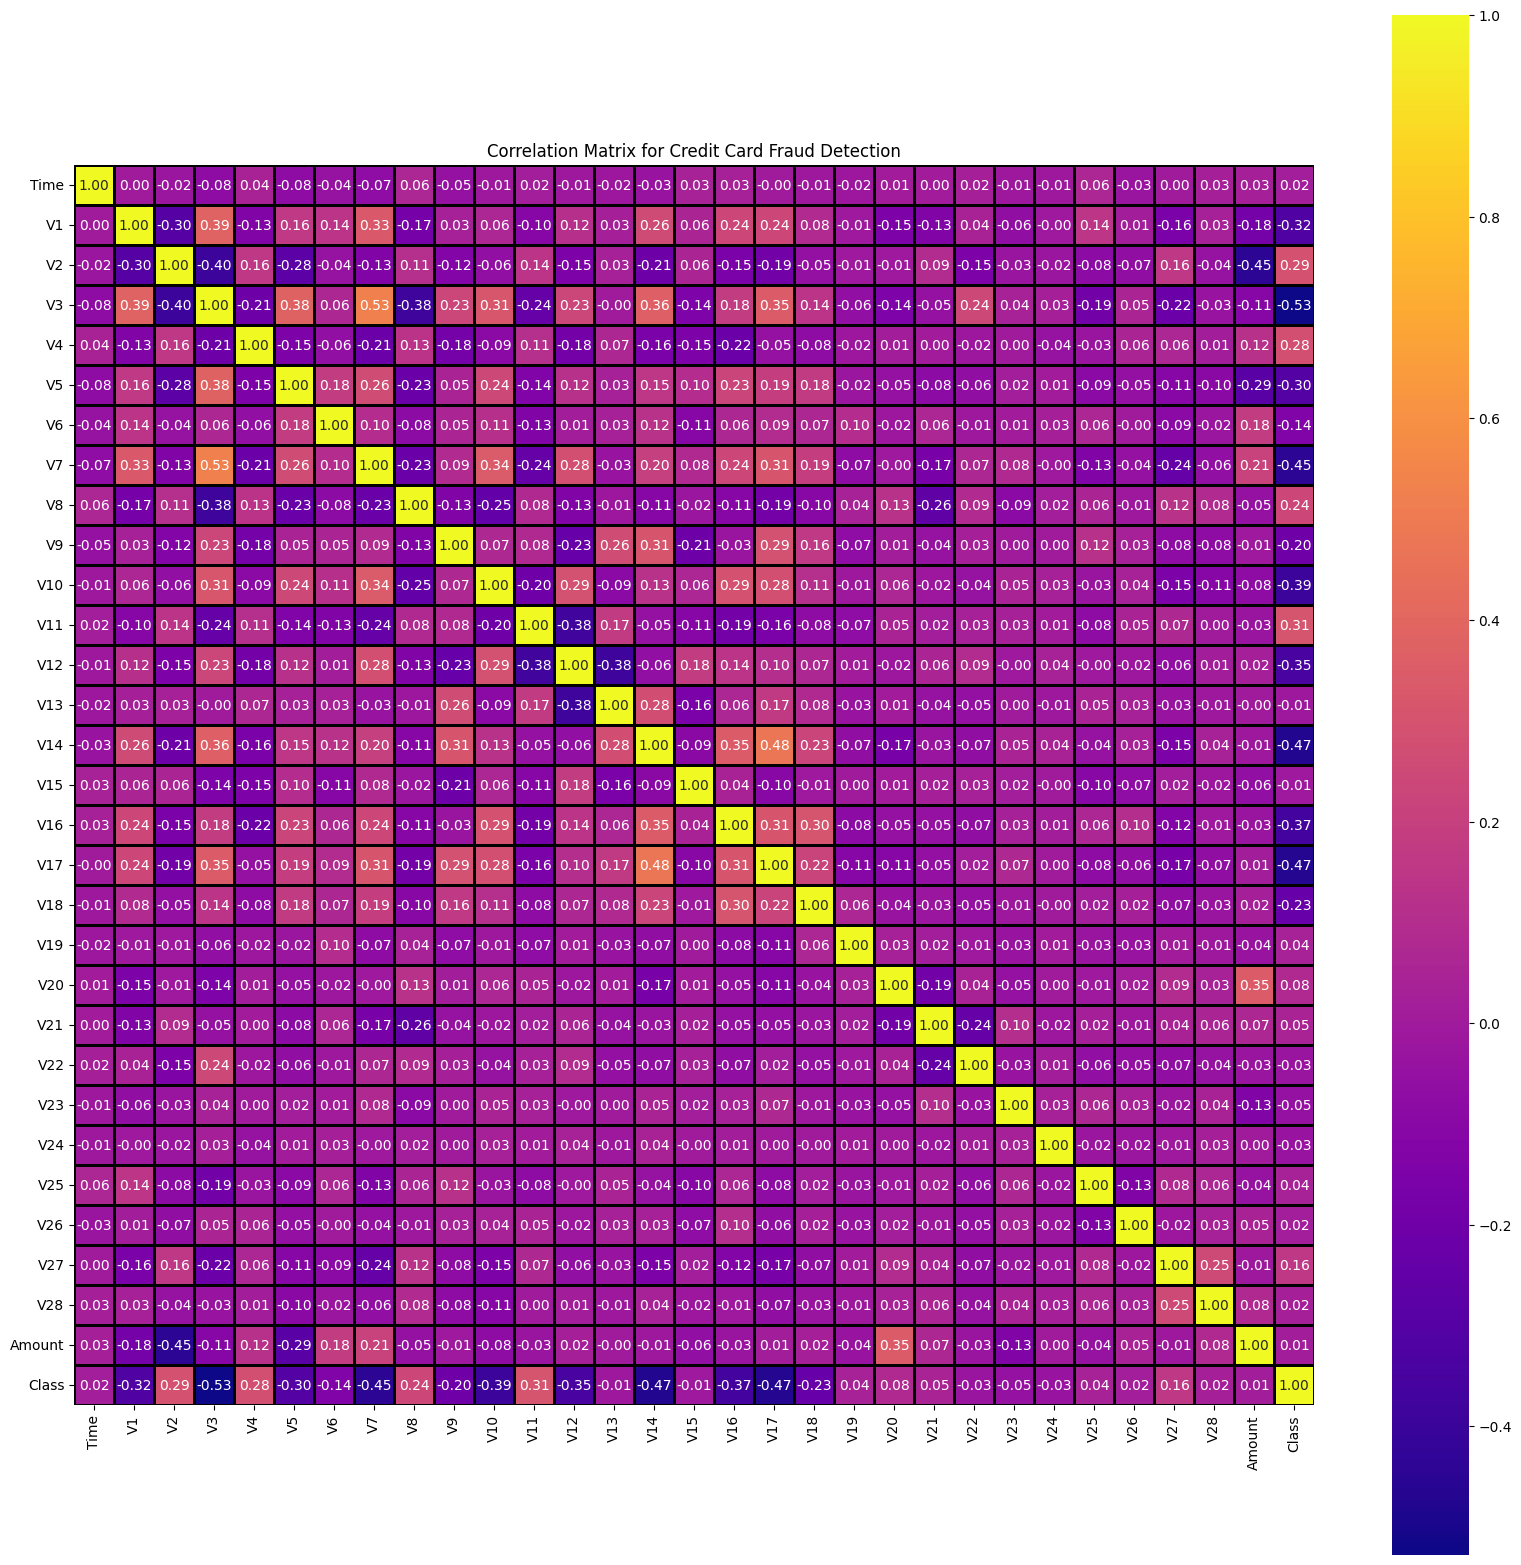

In [16]:
corr_mat=df.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,annot=True,fmt="0.2f",square=True,cmap="plasma",linewidths=0.8,linecolor="Black")
plt.title("Correlation Matrix for Credit Card Fraud Detection")

In [17]:
h_feature=corr_mat.index[abs(corr_mat['Class'])>=0.1].tolist()
h_feature.remove('Class')
h_feature

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V27']

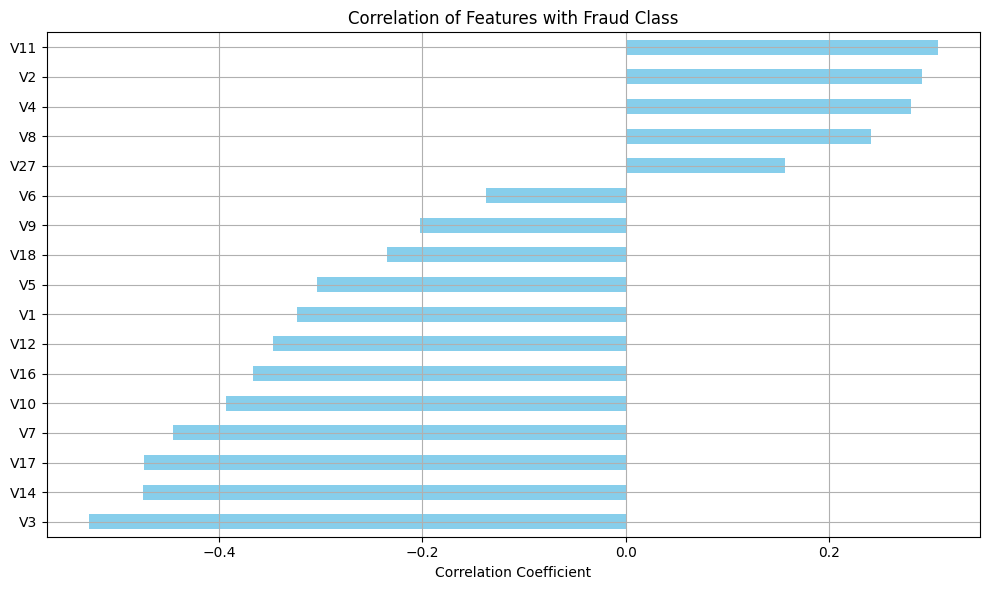

In [18]:
import matplotlib.pyplot as plt


correlations = corr_mat['Class'][h_feature].sort_values()


plt.figure(figsize=(10, 6))
correlations.plot(kind='barh', color='skyblue')
plt.title('Correlation of Features with Fraud Class')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()

A horizontal bar chart is used to display the correlation strength of each selected feature with fraud (Class = 1).

The sign of the values (positive or negative) indicates the direction of the correlation.

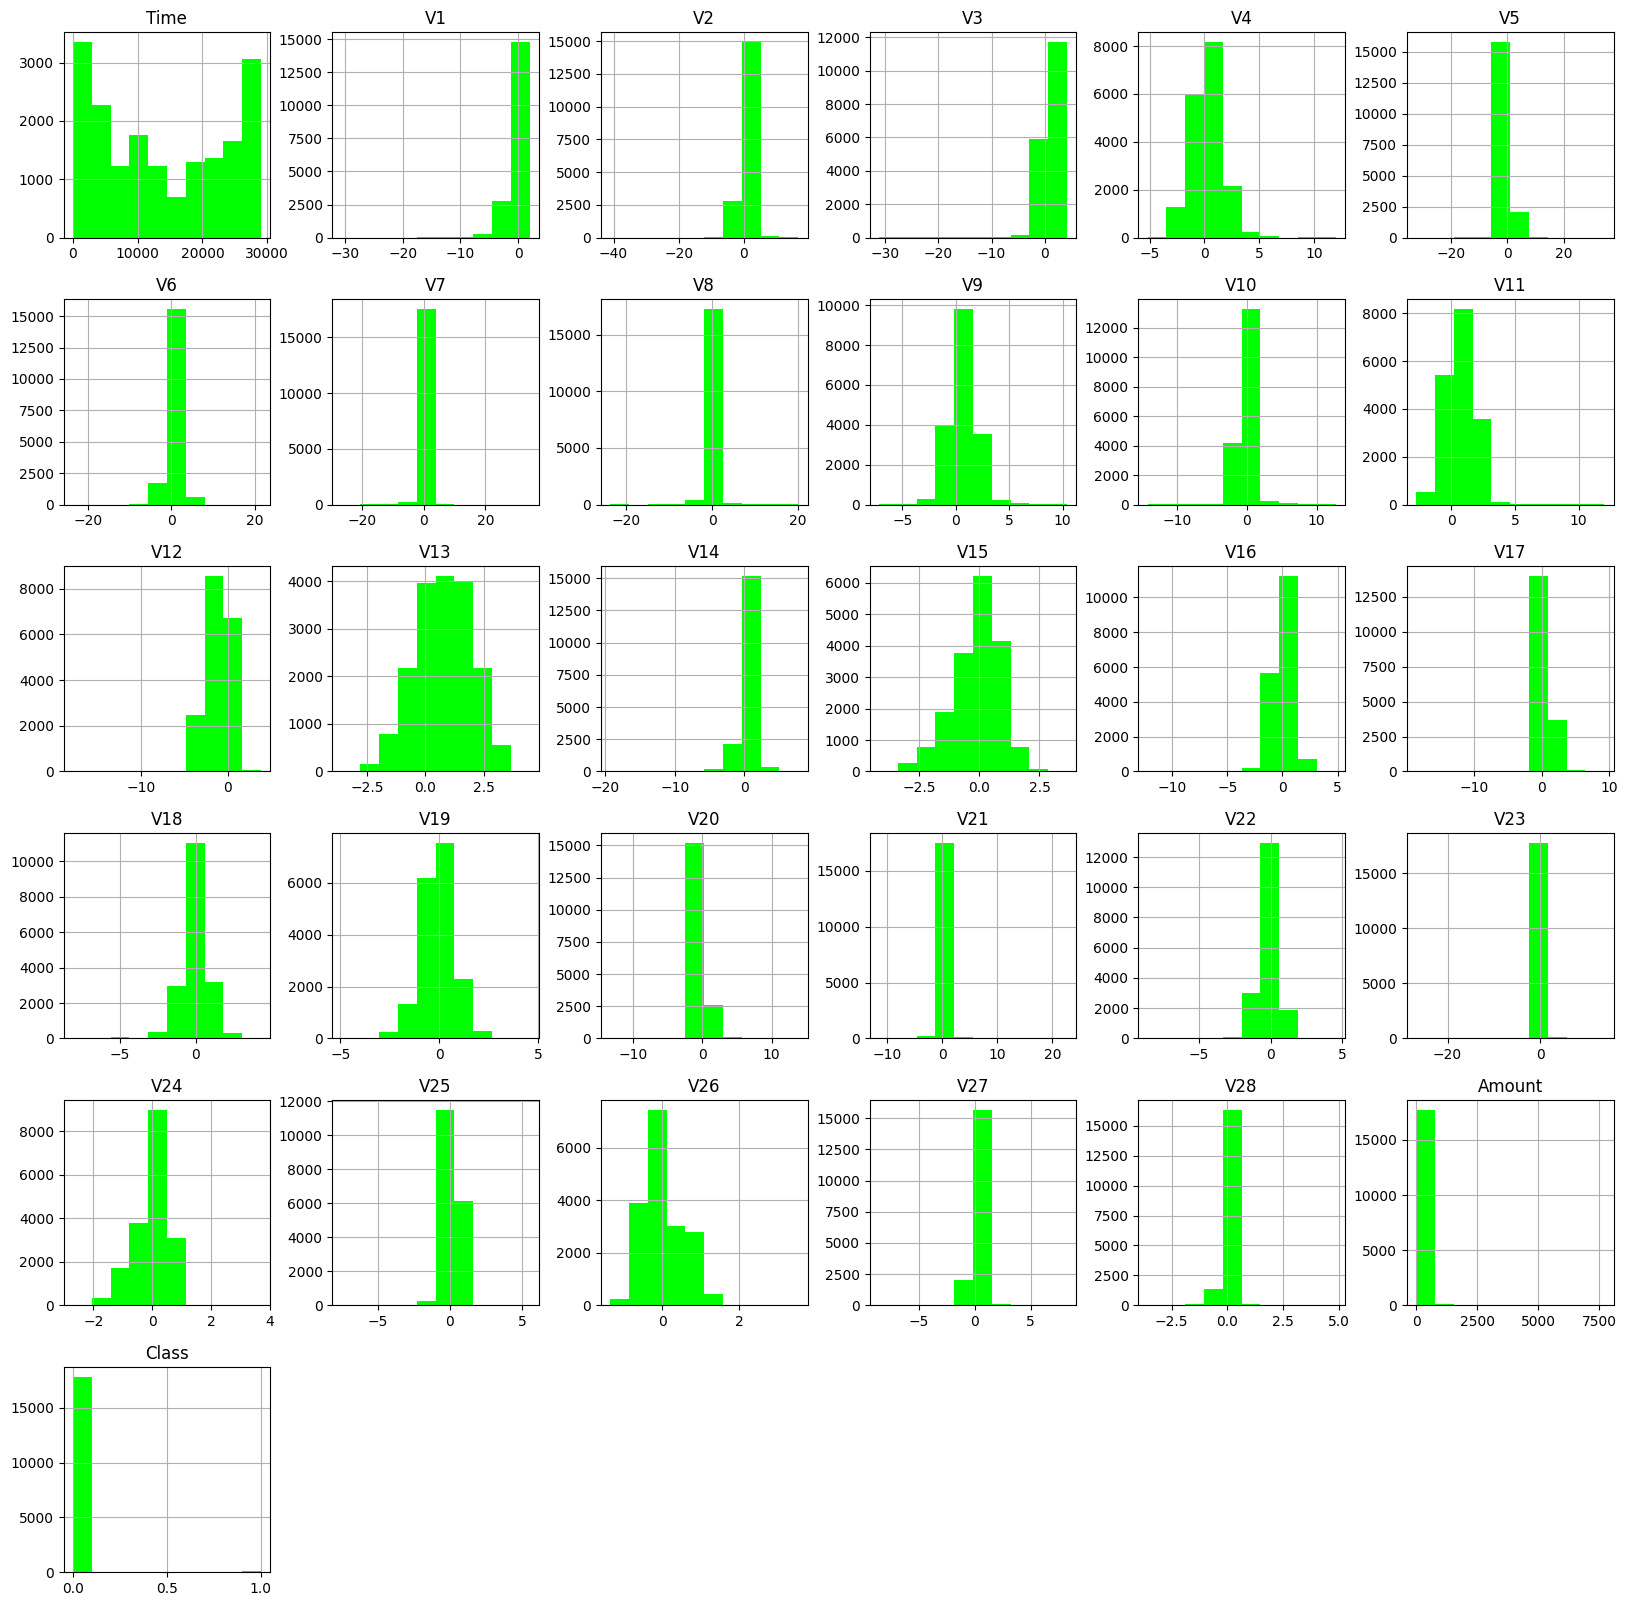

In [19]:
df.hist(figsize=(20,20),color='lime')
plt.show()

In [20]:
fraud=df[df['Class']==1]

In [21]:
genuine=df[df['Class']==0]

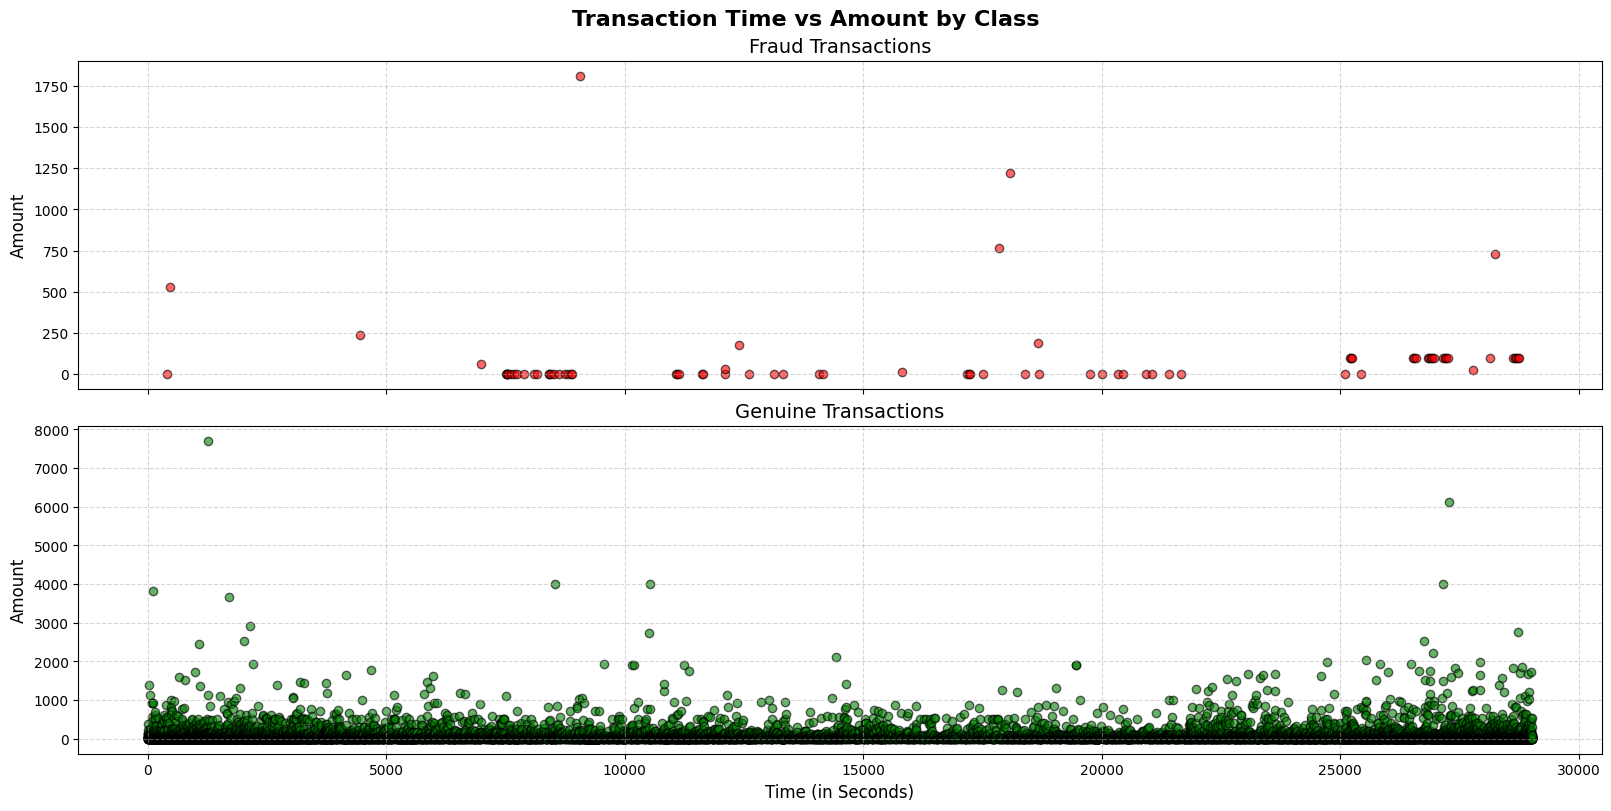

In [22]:
import matplotlib.pyplot as plt
from matplotlib import rcParams


rcParams['figure.figsize'] = (16, 8)


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, constrained_layout=True)
fig.suptitle('Transaction Time vs Amount by Class', fontsize=16, weight='bold')


ax1.scatter(fraud['Time'], fraud['Amount'], color='red', alpha=0.6, edgecolor='k')
ax1.set_title('Fraud Transactions', fontsize=14)
ax1.set_ylabel('Amount', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)


ax2.scatter(genuine['Time'], genuine['Amount'], color='green', alpha=0.6, edgecolor='k')
ax2.set_title('Genuine Transactions', fontsize=14)
ax2.set_xlabel('Time (in Seconds)', fontsize=12)
ax2.set_ylabel('Amount', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)

plt.show()



/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


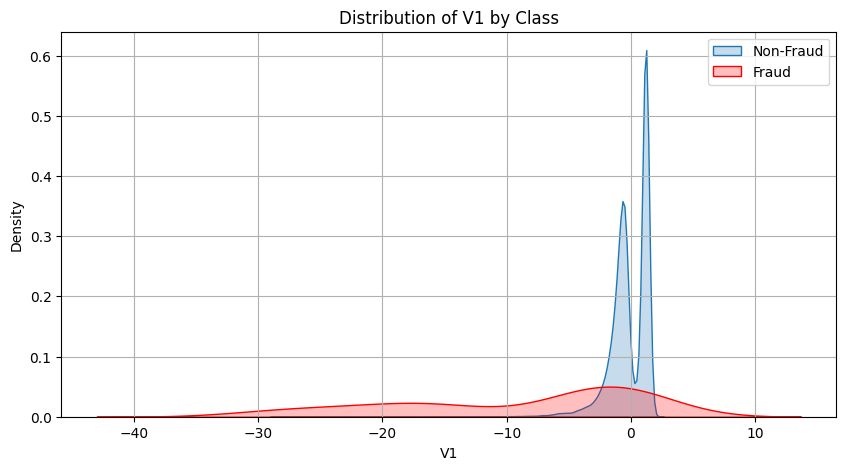

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


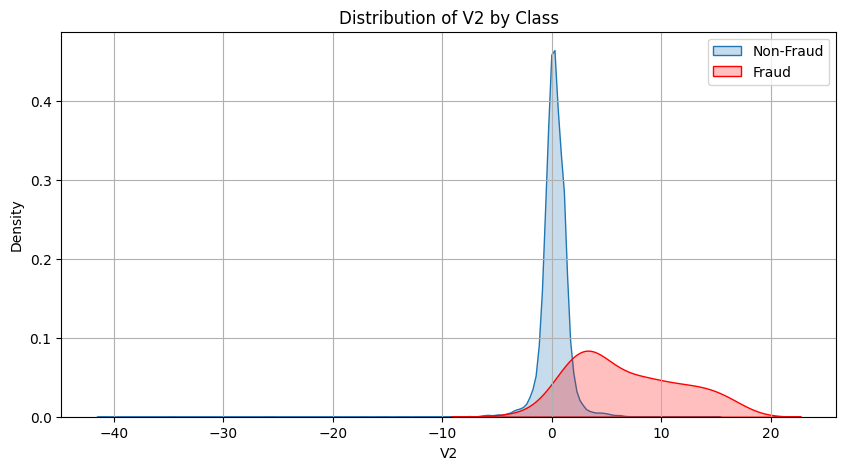

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


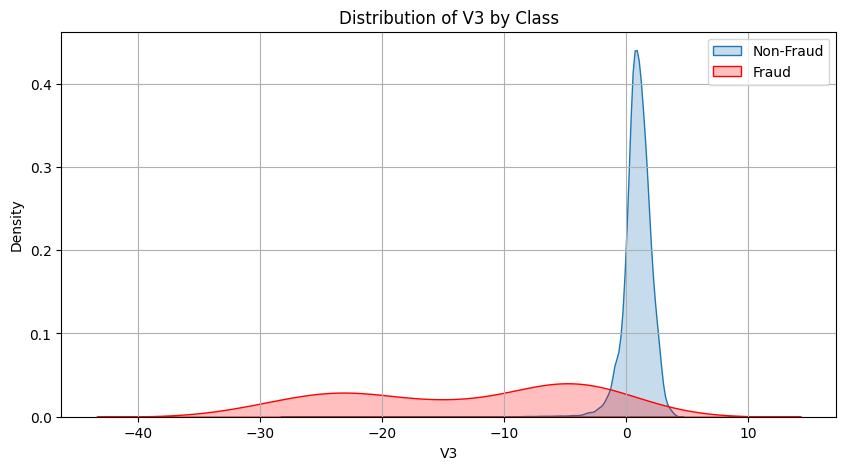

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


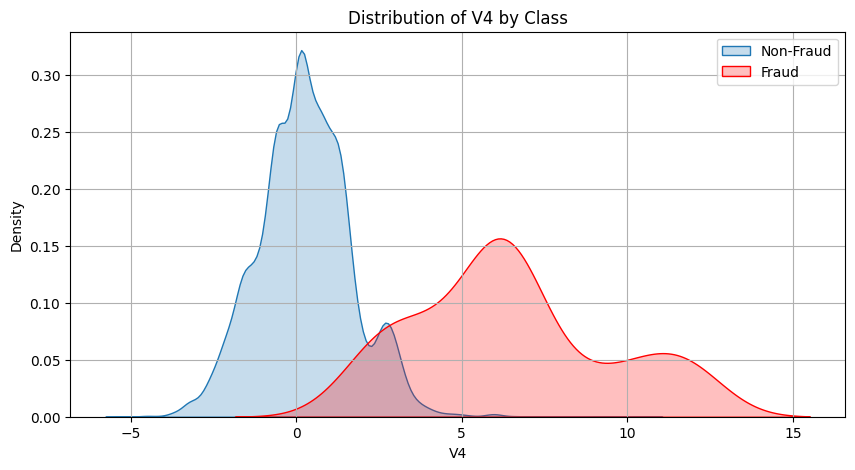

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


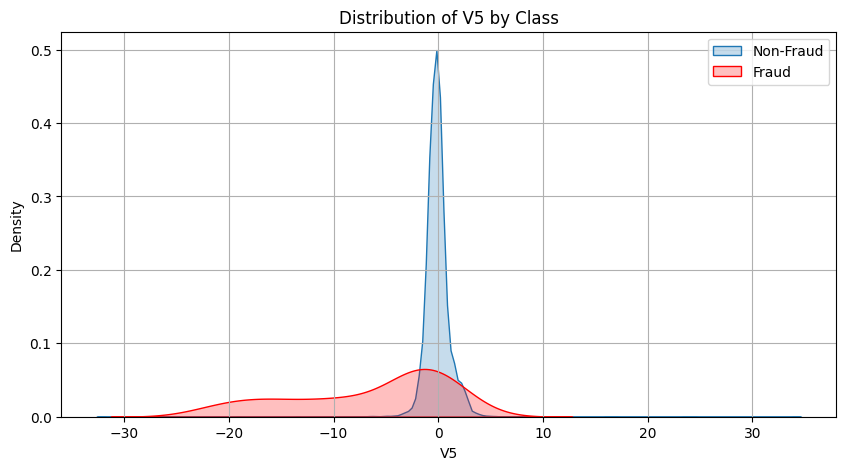

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


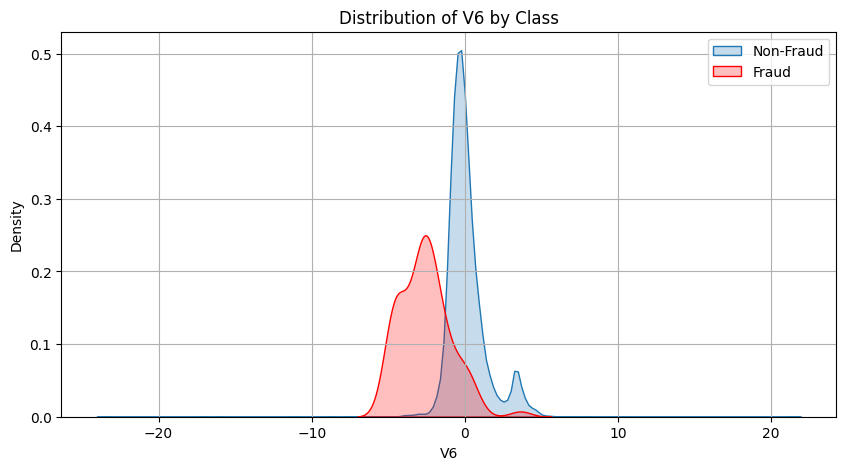

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


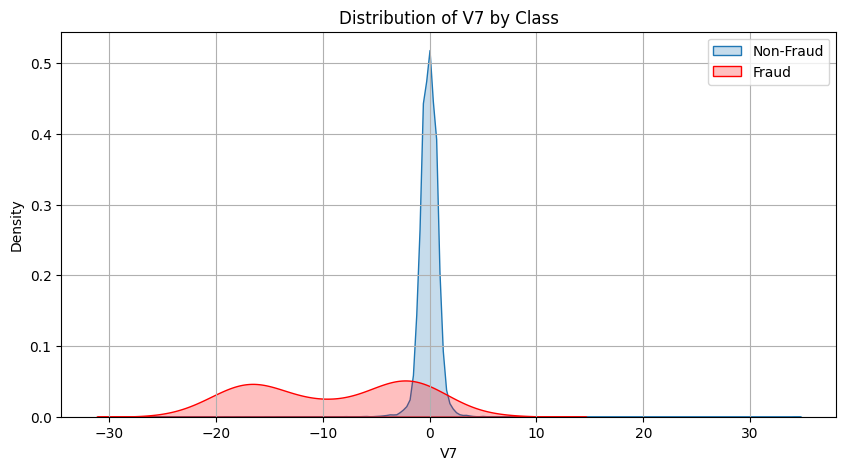

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


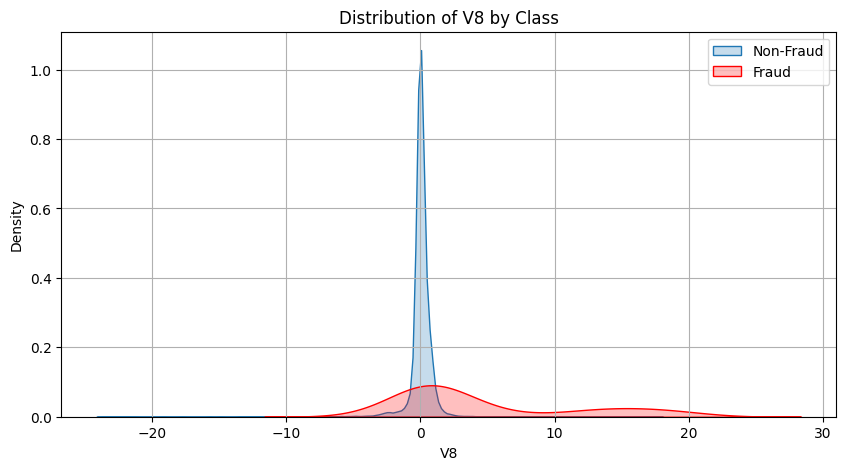

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


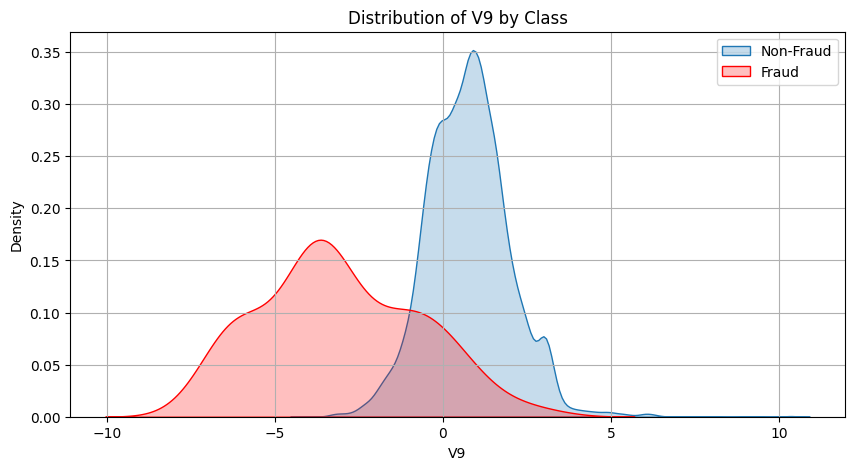

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


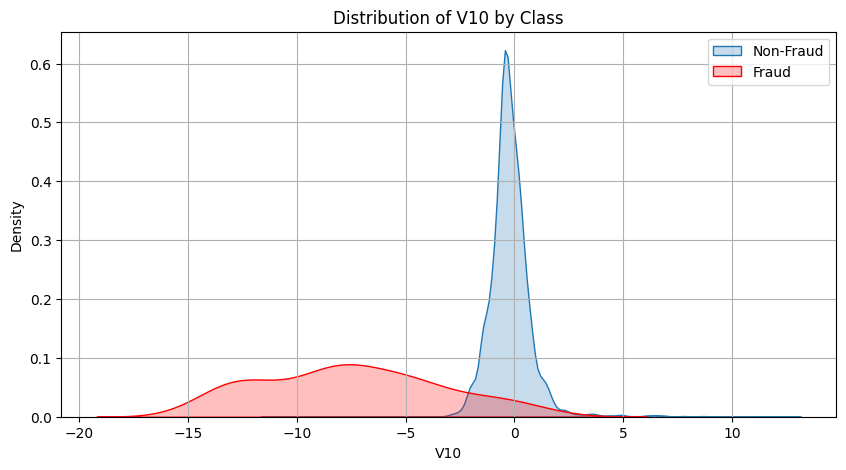

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


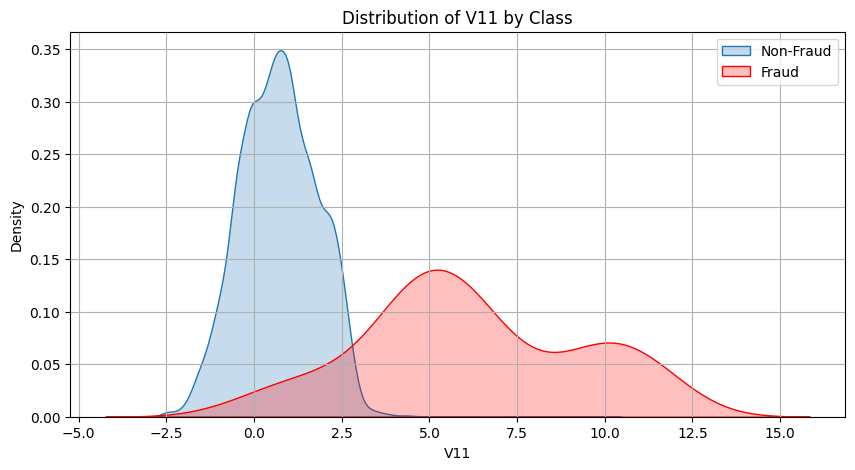

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


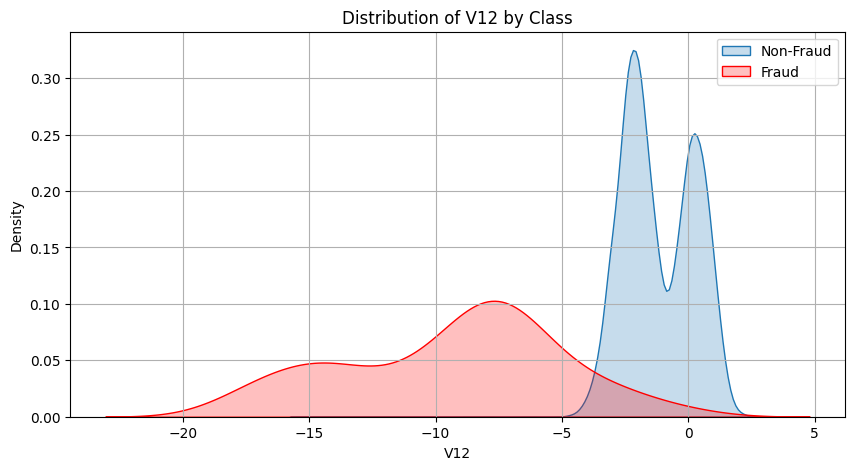

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


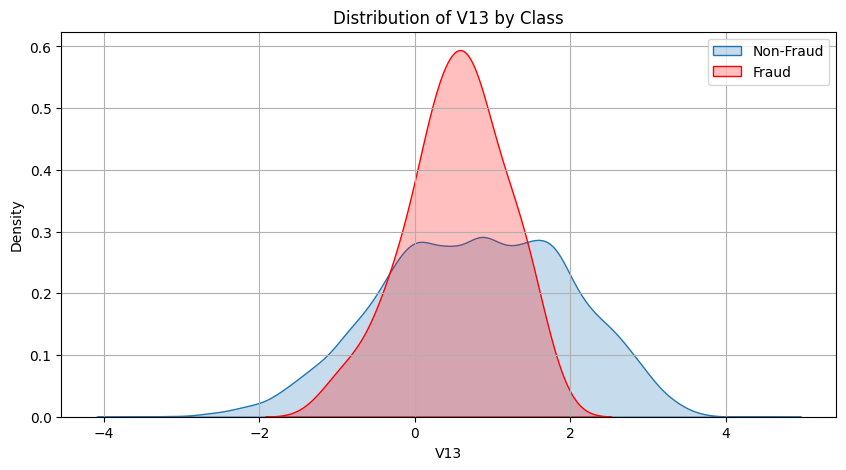

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


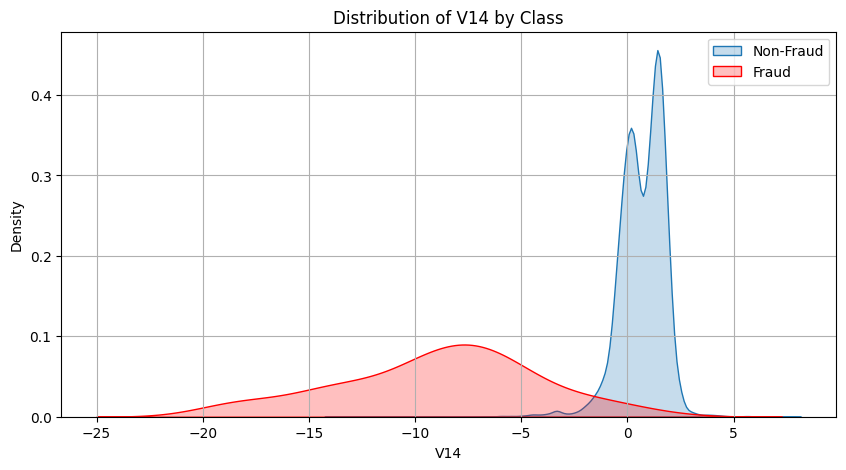

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


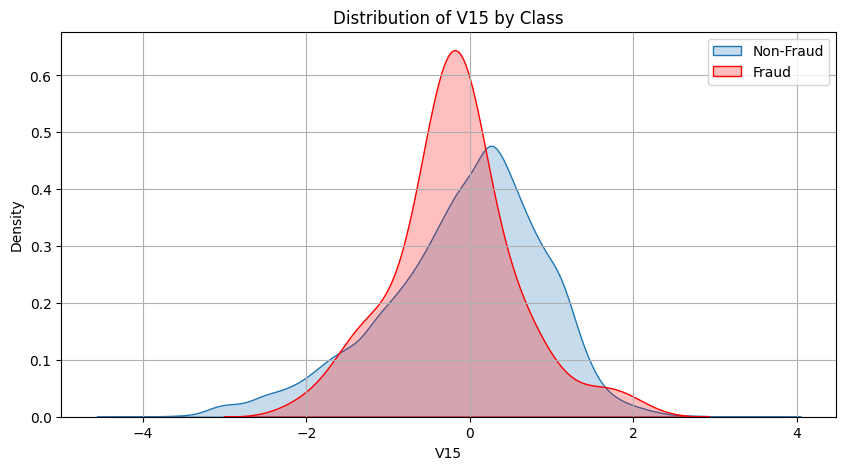

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


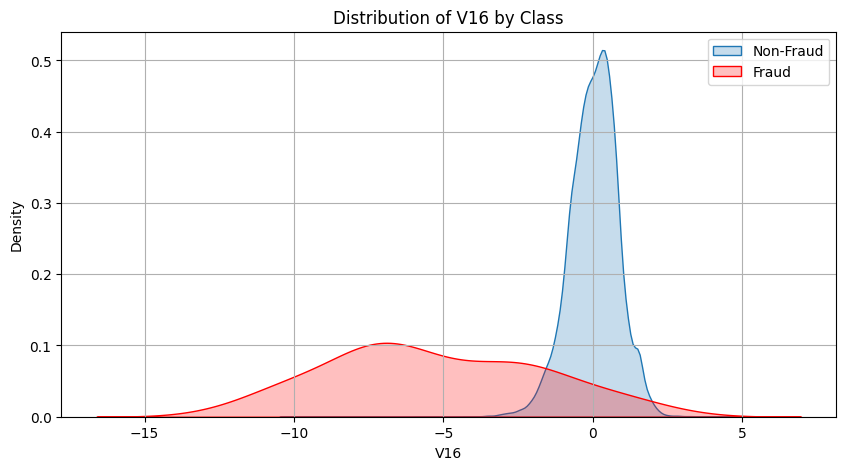

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


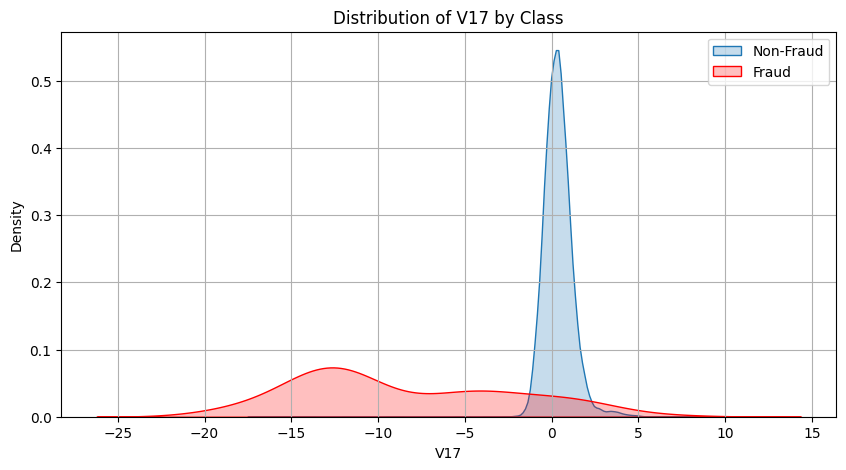

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


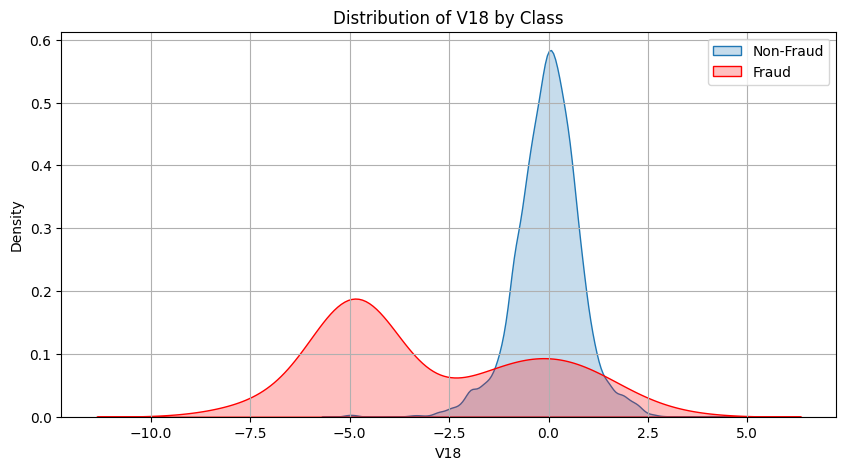

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


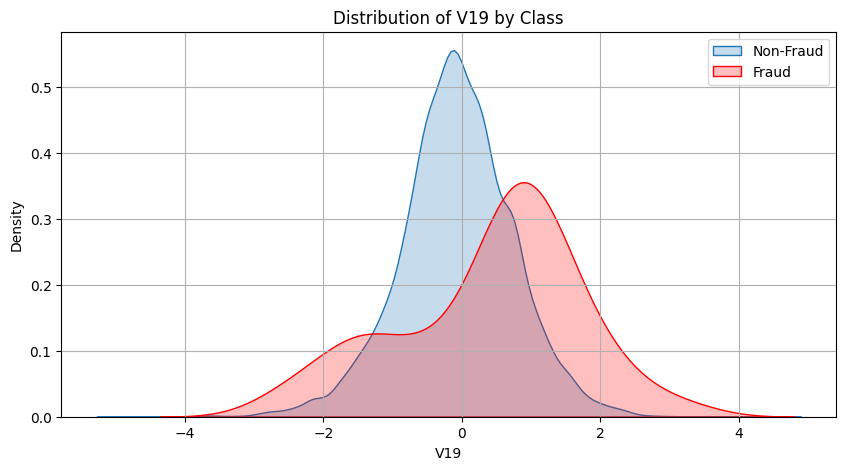

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


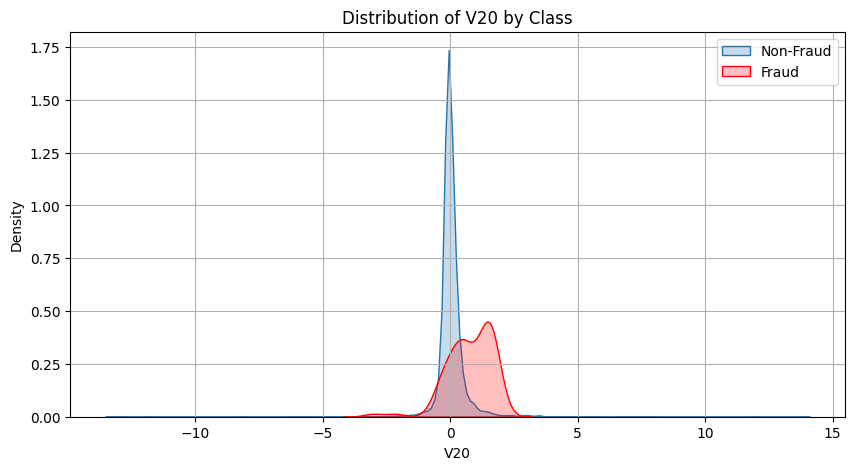

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


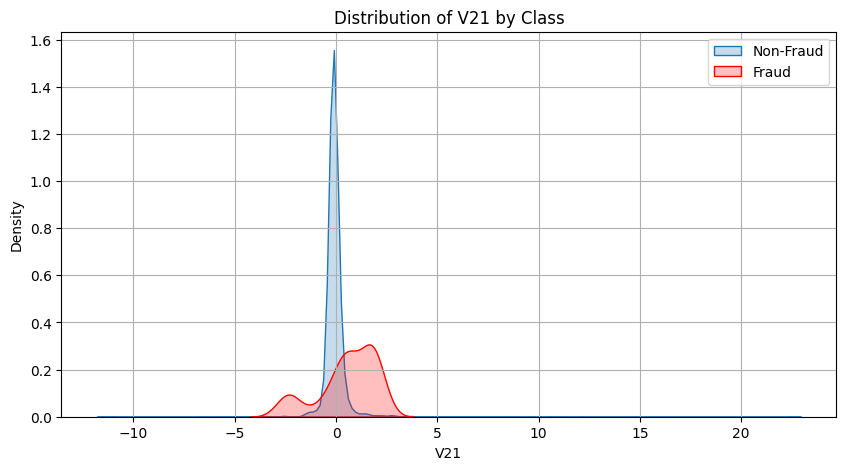

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


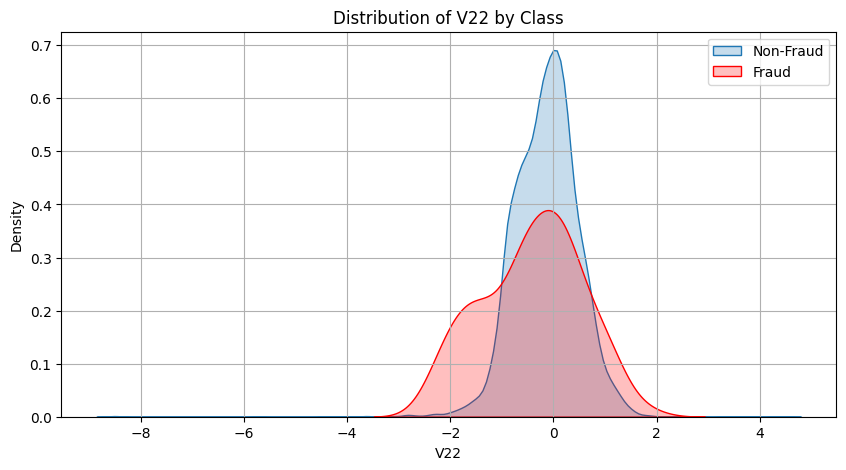

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


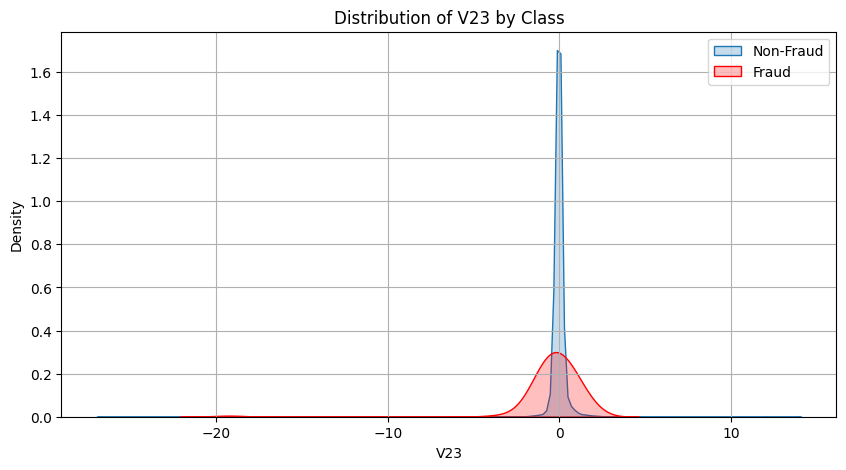

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


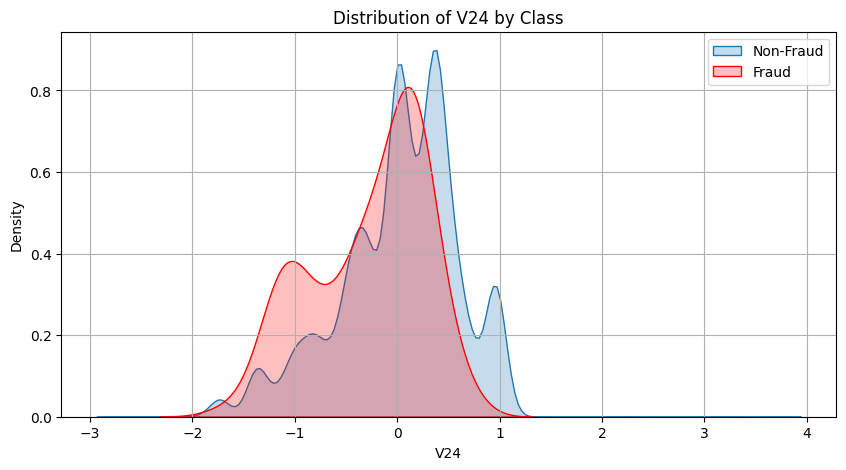

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


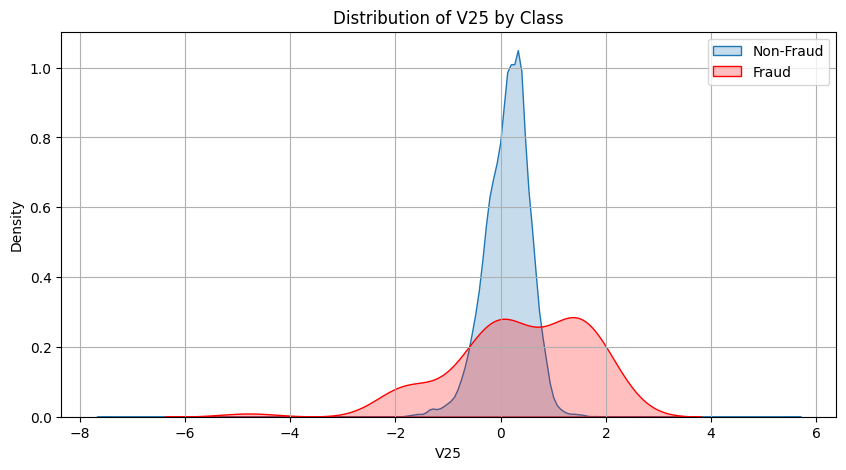

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


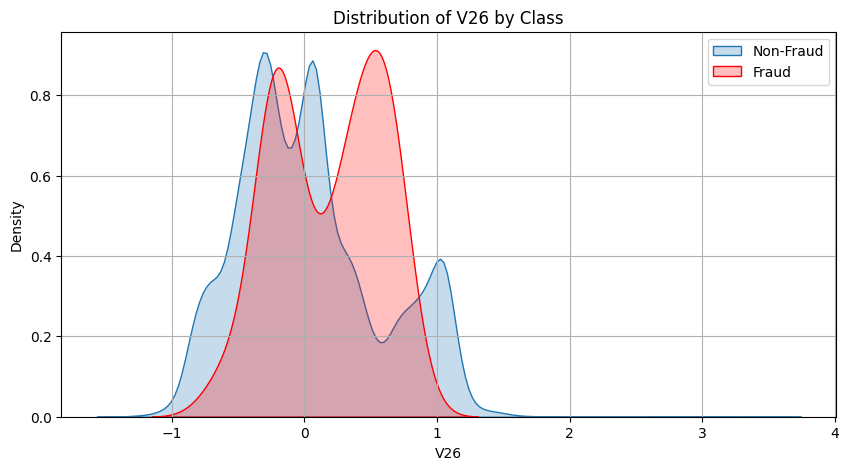

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


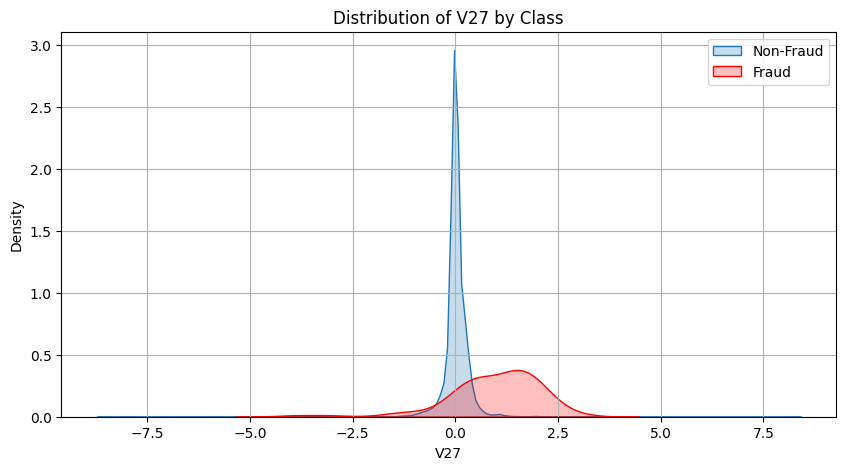

/tmp/ipython-input-2041457726.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
/tmp/ipython-input-2041457726.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')


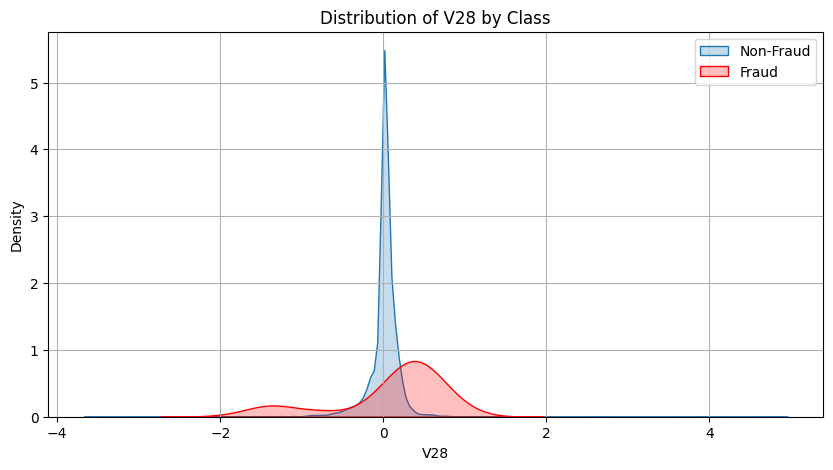

In [23]:
important_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

for feature in important_features:
    plt.figure(figsize=(10,5))
    sns.kdeplot(df[df['Class']==0][feature], label='Non-Fraud', shade=True)
    sns.kdeplot(df[df['Class']==1][feature], label='Fraud', shade=True, color='red')
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

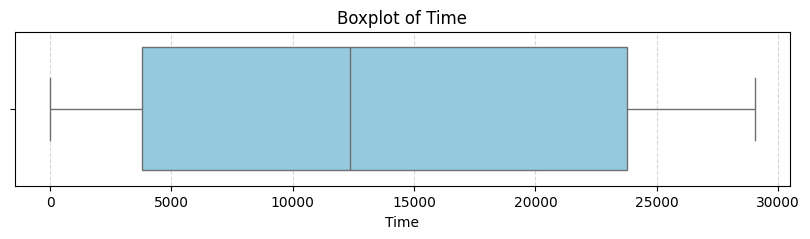

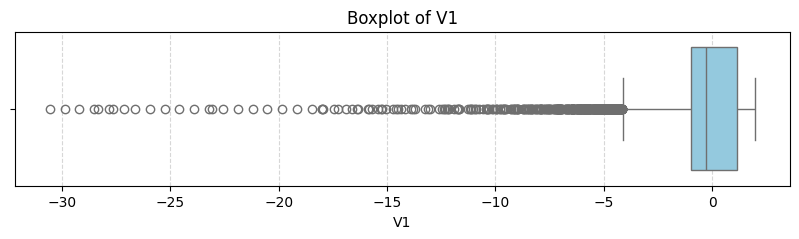

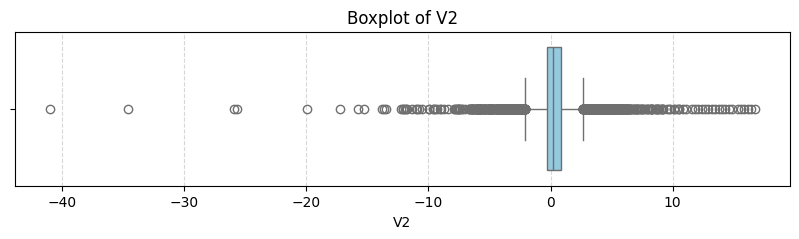

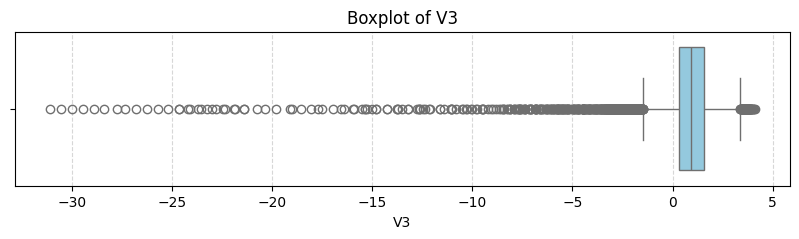

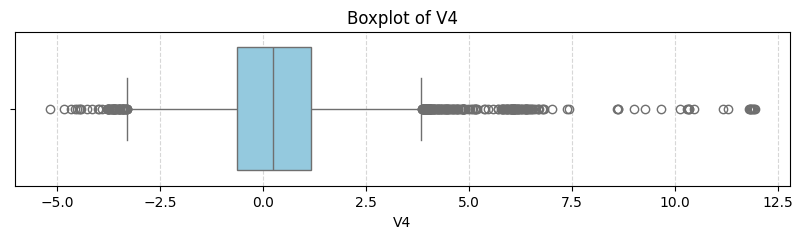

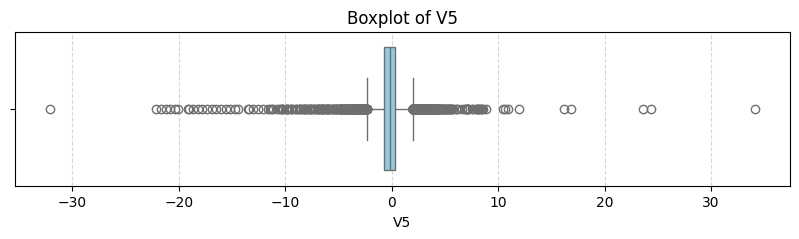

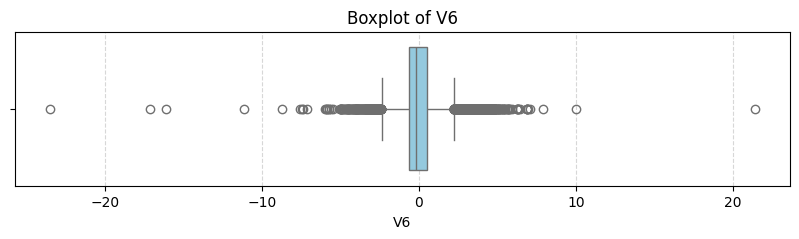

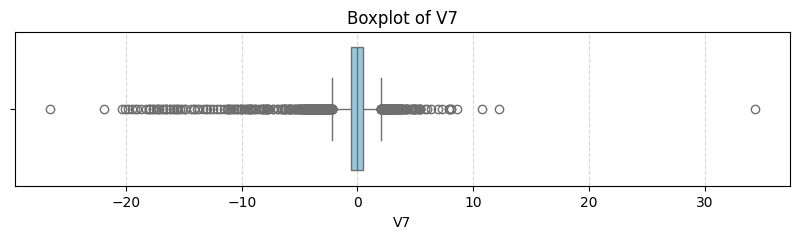

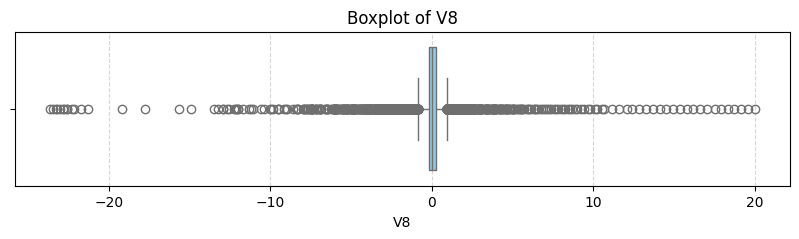

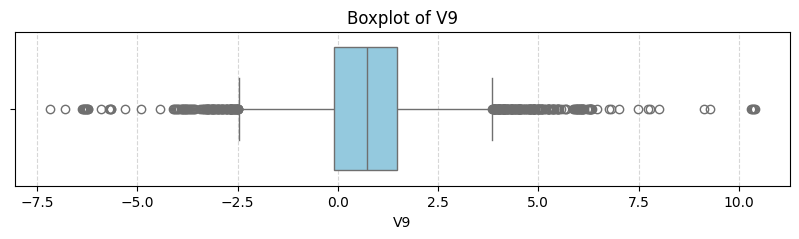

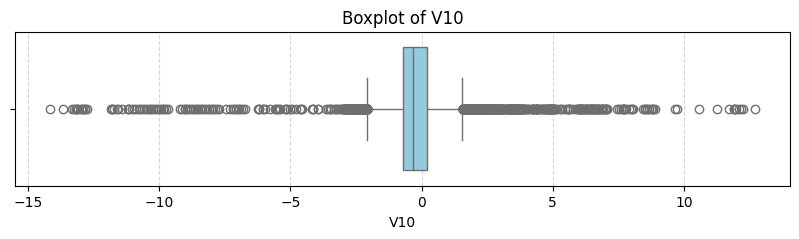

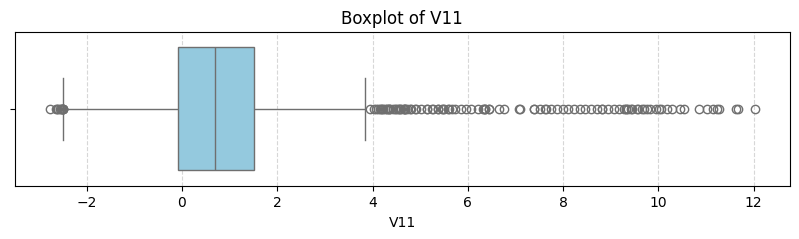

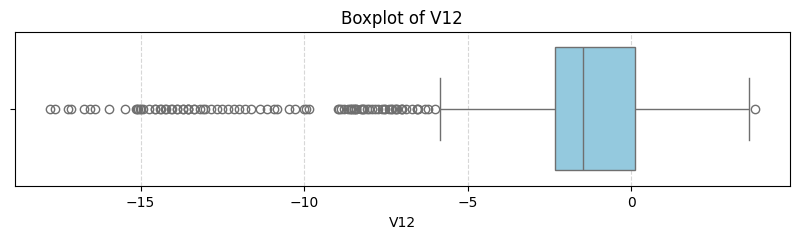

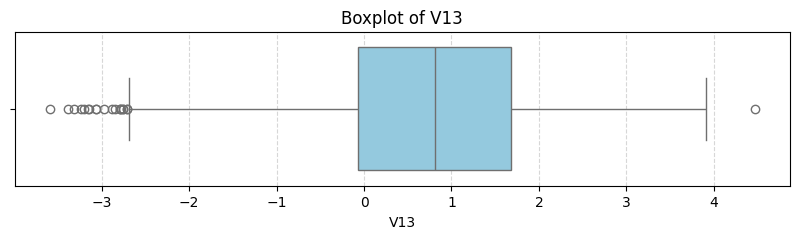

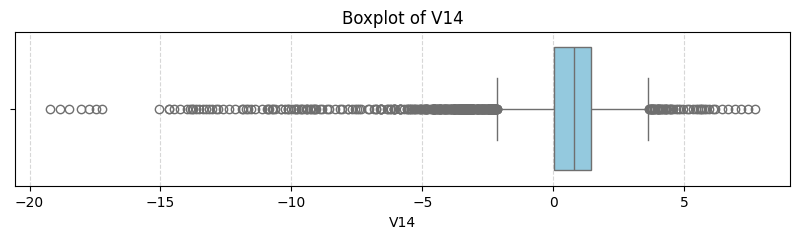

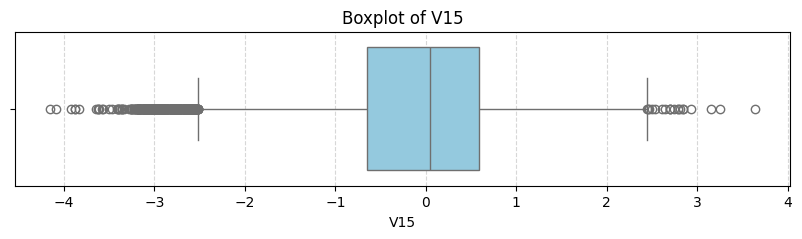

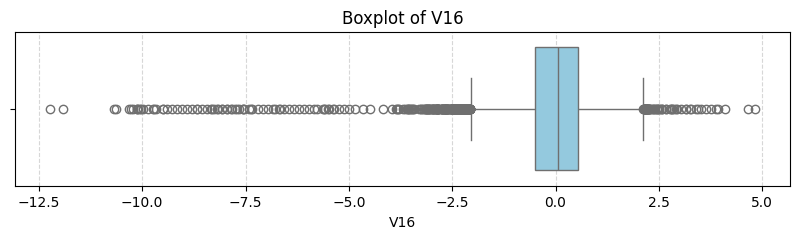

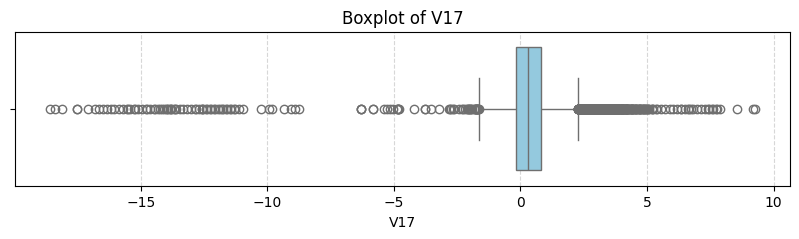

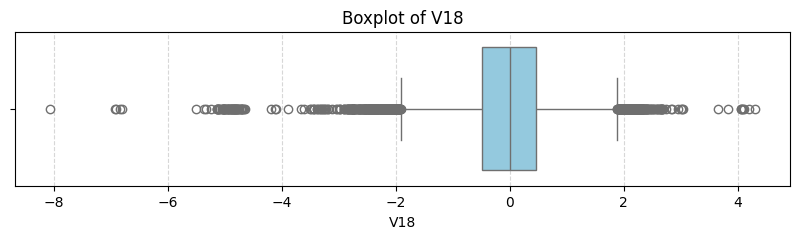

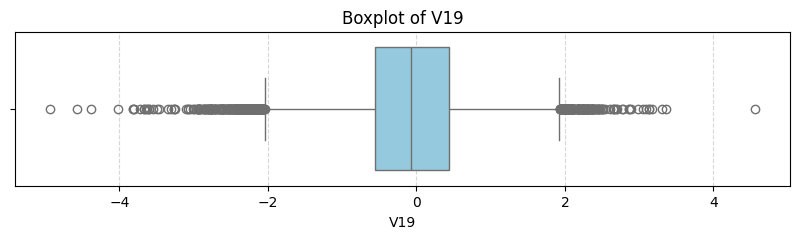

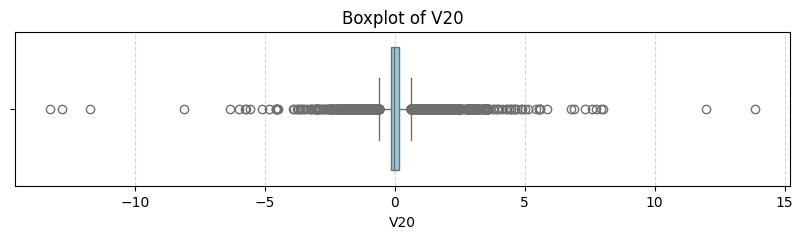

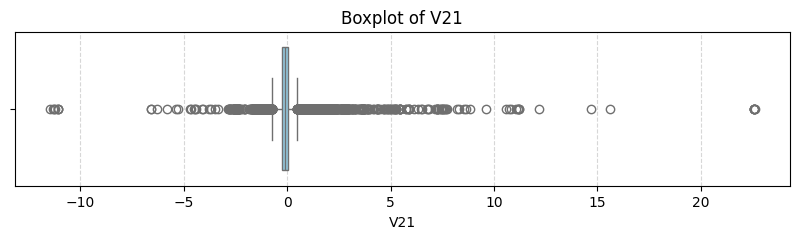

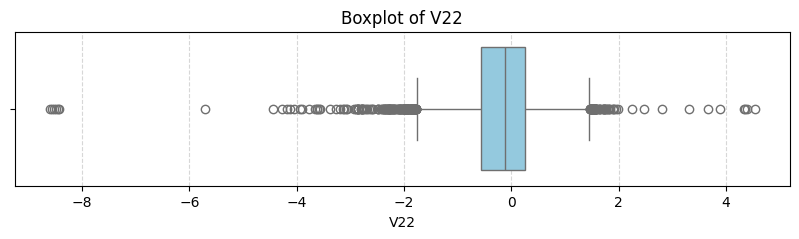

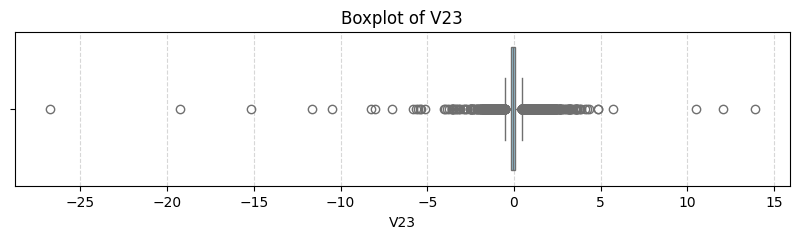

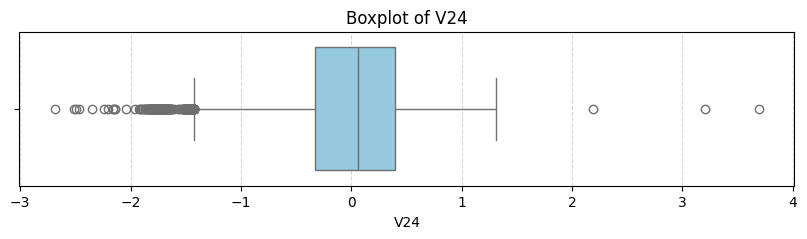

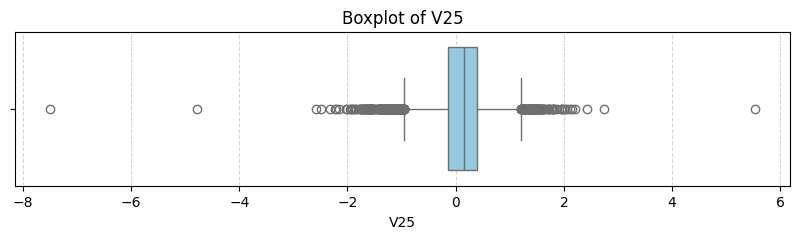

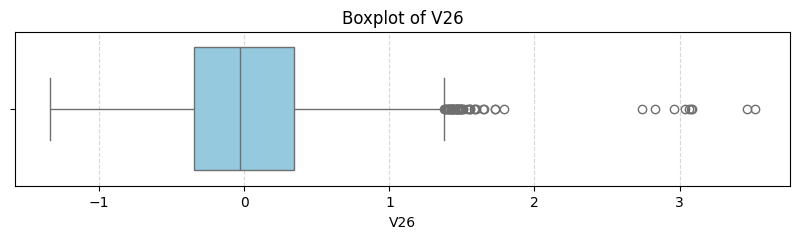

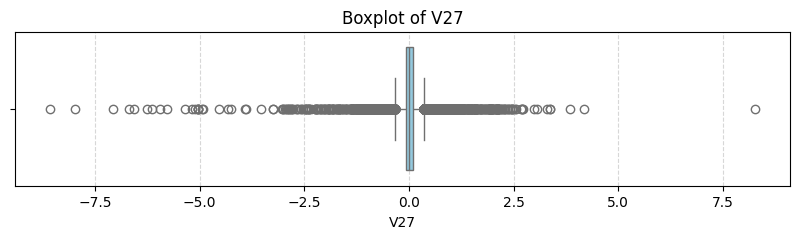

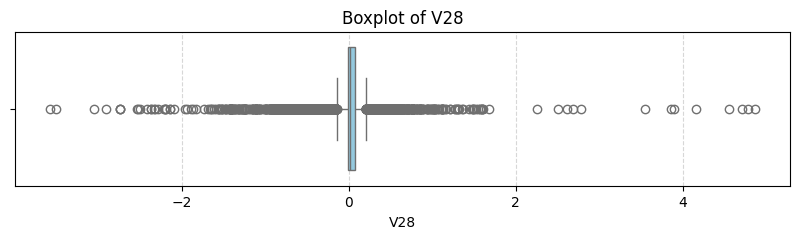

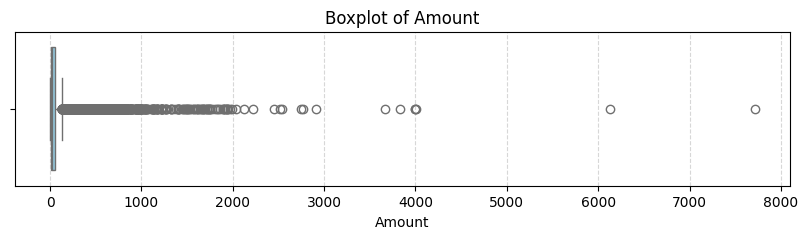

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


columns = [
    'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
    'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'
]


for col in columns:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}", fontsize=12)
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()


**relationship of fraud transactions with amount of money**

In [25]:
def countplot_data(data, feature):
    '''
        Method to compute countplot of given dataframe
        Parameters:
            data(pd.Dataframe): Input Dataframe
            feature(str): Feature in Dataframe
    '''
    plt.figure(figsize=(10,10))
    sns.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target, size=6).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

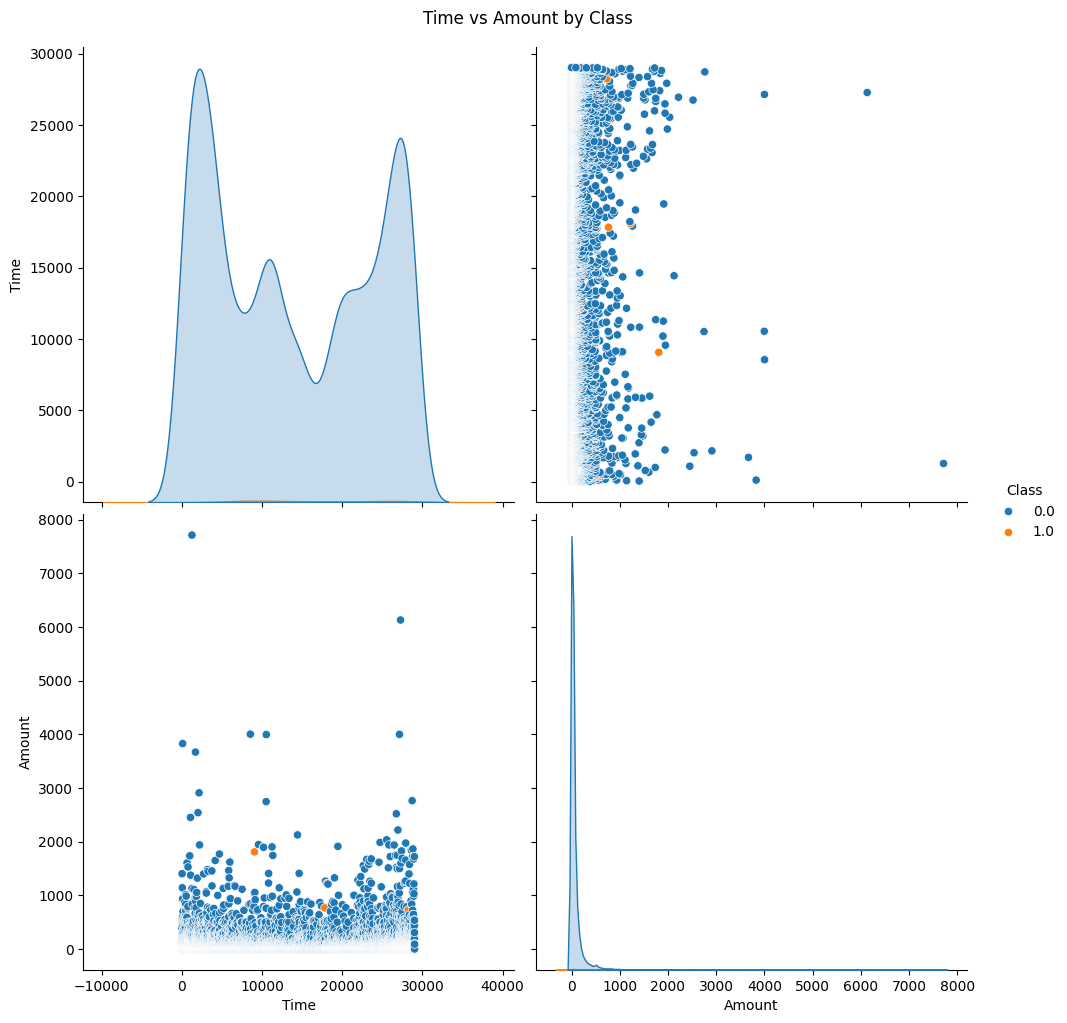

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot only Time vs Amount, colored by Class
sns.pairplot(
    df,
    vars=["Time", "Amount"],
    hue="Class",
    height=5,
    diag_kind="kde"
)

plt.suptitle("Time vs Amount by Class", y=1.02)
plt.show()


Fraudulent transactions rarely exceed an amount of 5000, indicating a potential upper bound in fraudulent activity values.

Furthermore, their distribution appears relatively uniform across time, suggesting no strong temporal concentration.



In [27]:
amount_more = 0
amount_less = 0
for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"] < 5000):
        amount_less += 1
    else:
        amount_more += 1
print(amount_more)
print(amount_less)

3
17915


In [28]:

amount_less = (df["Amount"] < 2500).sum()
amount_more = (df["Amount"] >=2500).sum()

print("Transactions >= 2500:", amount_more)
print("Transactions < 2500:", amount_less)


Transactions >= 2500: 12
Transactions < 2500: 17905


In [29]:
percentage_less = (amount_less/df.shape[0])*100
percentage_less

np.float64(99.92744725973881)

The analysis indicates that 99.85% of transactions involve amounts below 2,500. To gain further insights, we examine the distribution of these transactions between fraudulent and legitimate categories. This observation is critical as it highlights that most fraudulent activity occurs within relatively low-value transactions, which may evade traditional high-value fraud detection thresholds

In [30]:

low_amount = df[df["Amount"] < 2500]


fraud = (low_amount["Class"] == 1).sum()
legitimate = (low_amount["Class"] == 0).sum()

print("Fraudulent transactions (<2500):", fraud)
print("Legitimate transactions (<2500):", legitimate)


Fraudulent transactions (<2500): 81
Legitimate transactions (<2500): 17824


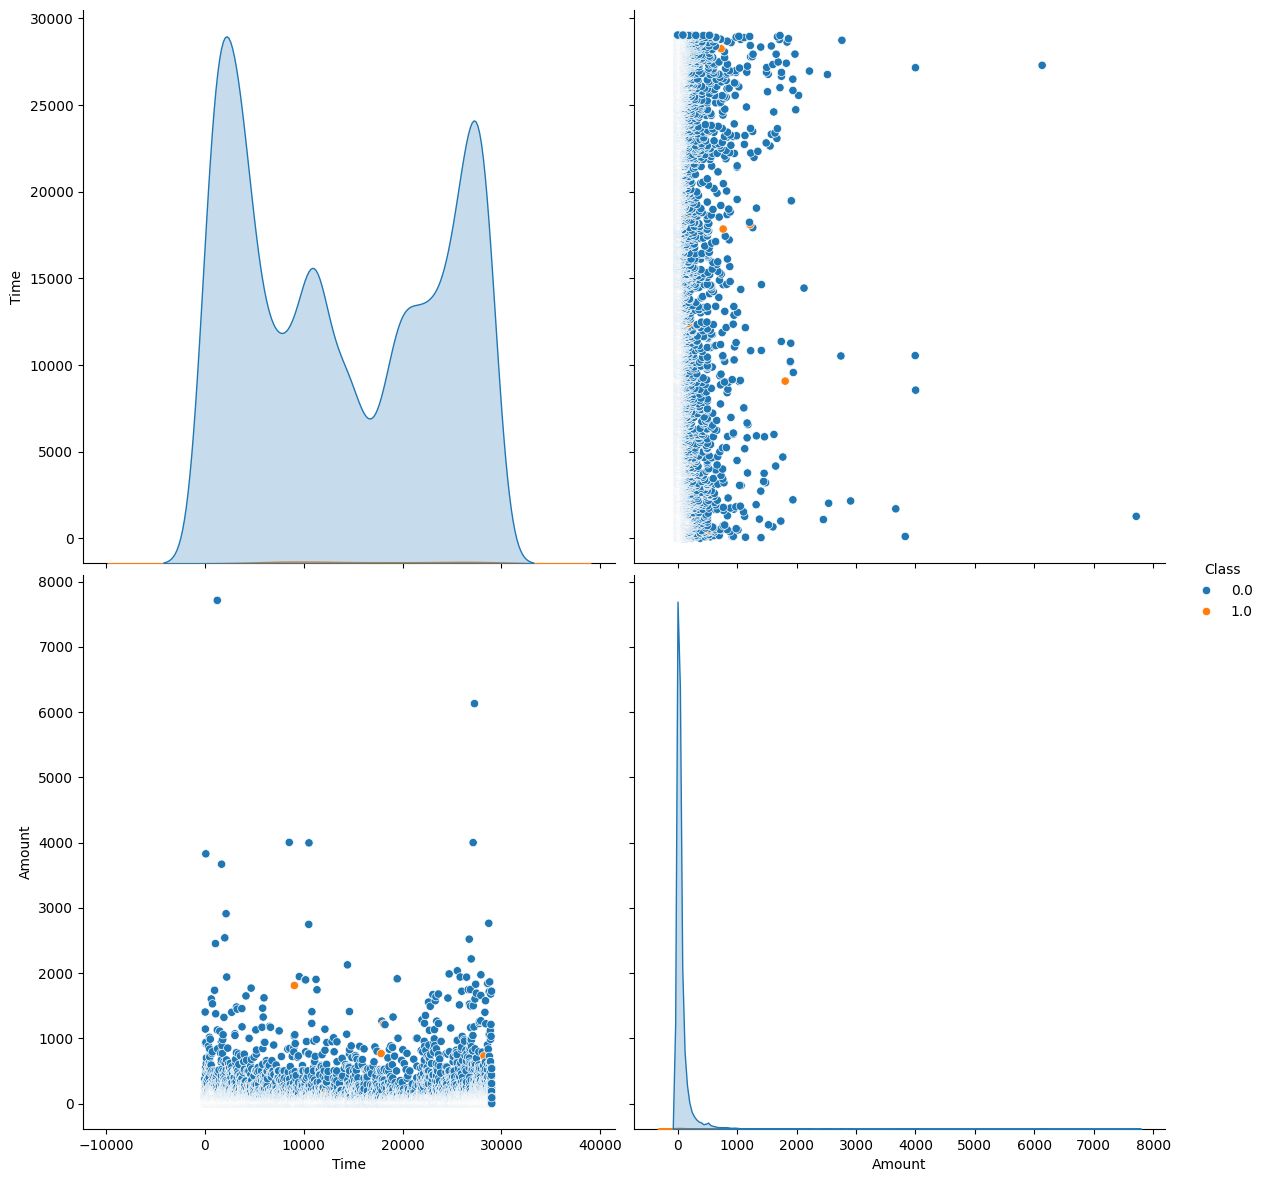

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


df = df[["Time", "Amount", "Class"]]


sns.pairplot(df, hue="Class", height=6)
plt.show()


In [32]:

class_counts = df["Class"].value_counts()

print(class_counts)


Class
0.0    17836
1.0       81
Name: count, dtype: int64


The analysis shows that the count of fraudulent transactions below 2,500 is equal to the total number of fraudulent transactions. This indicates that all identified fraud cases occur within this amount threshold, highlighting the importance of monitoring low-value transactions when designing fraud detection strategies, as fraudulent activity may not always be associated with high-value amounts.

#### Train Test and Split

In [33]:
from sklearn.model_selection import train_test_split

In [38]:
df = df.dropna(subset=['Class'])
X = df.drop('Class',axis=1)
y = df['Class']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:

log_reg_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced', max_iter=1000)
)

rf_model = RandomForestClassifier(class_weight='balanced')

xgb_model = XGBClassifier(scale_pos_weight=578)

In [93]:
models = {
    "Logistic Regression": log_reg_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}


for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")


Logistic Regression trained successfully.
Random Forest trained successfully.
XGBoost trained successfully.


### Test results and Evaluation

In [95]:
from sklearn.metrics import f1_score, roc_auc_score

models = {
    "Logistic Regression": log_reg_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    # Predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Metrics
    f1_train = f1_score(y_train, train_preds)
    f1_test = f1_score(y_test, test_preds)
    roc_auc_train = roc_auc_score(y_train, train_preds)
    roc_auc_test = roc_auc_score(y_test, test_preds)

    # Results
    print(f"\n{name} Performance:")
    print(f"  F1 Score  - Train: {f1_train:.4f}, Test: {f1_test:.4f}")
    print(f"  ROC AUC   - Train: {roc_auc_train:.4f}, Test: {roc_auc_test:.4f}")



Logistic Regression Performance:
  F1 Score  - Train: 0.0097, Test: 0.0103
  ROC AUC   - Train: 0.5248, Test: 0.5168

Random Forest Performance:
  F1 Score  - Train: 0.9910, Test: 0.3556
  ROC AUC   - Train: 1.0000, Test: 0.6528

XGBoost Performance:
  F1 Score  - Train: 0.6790, Test: 0.3810
  ROC AUC   - Train: 0.9979, Test: 0.7284



Logistic Regression Performance:
  F1 Score  - Train: 0.0097, Test: 0.0103
  ROC AUC   - Train: 0.5248, Test: 0.5168


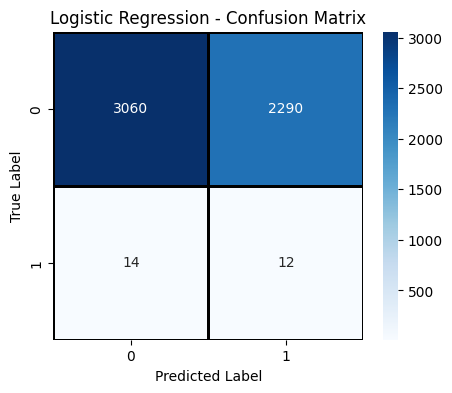


Random Forest Performance:
  F1 Score  - Train: 0.9910, Test: 0.3556
  ROC AUC   - Train: 1.0000, Test: 0.6528


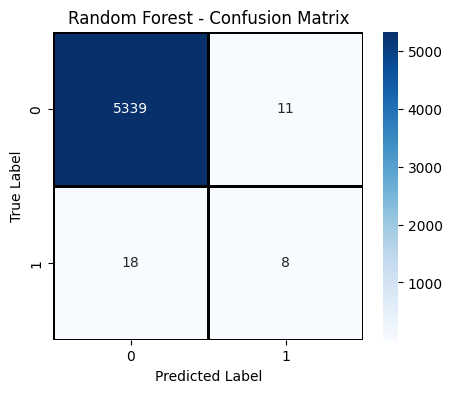


XGBoost Performance:
  F1 Score  - Train: 0.6790, Test: 0.3810
  ROC AUC   - Train: 0.9979, Test: 0.7284


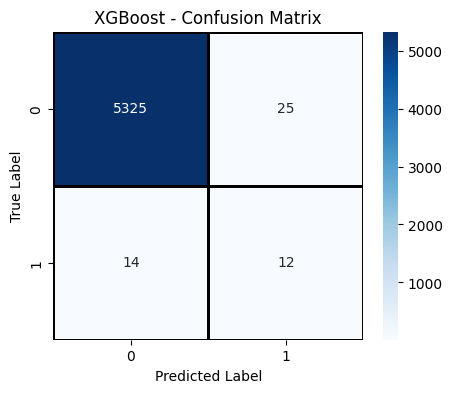

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

models = {
    "Logistic Regression": log_reg_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    # Predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Metrics
    f1_train = f1_score(y_train, train_preds)
    f1_test = f1_score(y_test, test_preds)
    roc_train = roc_auc_score(y_train, train_preds)
    roc_test = roc_auc_score(y_test, test_preds)

    # Print metrics
    print(f"\n{name} Performance:")
    print(f"  F1 Score  - Train: {f1_train:.4f}, Test: {f1_test:.4f}")
    print(f"  ROC AUC   - Train: {roc_train:.4f}, Test: {roc_test:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, test_preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=2, linecolor='black')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.savefig('/content/sample_data/confusion_matrix.png', dpi=300)
    plt.show()


In [107]:
from sklearn.metrics import classification_report

models = {
    "Logistic Regression": log_reg_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    # Predictions
    test_preds = model.predict(X_test)

    # Print classification report
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, test_preds, digits=4))





Logistic Regression Classification Report:

              precision    recall  f1-score   support

         0.0     0.9954    0.5720    0.7265      5350
         1.0     0.0052    0.4615    0.0103        26

    accuracy                         0.5714      5376
   macro avg     0.5003    0.5168    0.3684      5376
weighted avg     0.9907    0.5714    0.7230      5376


Random Forest Classification Report:

              precision    recall  f1-score   support

         0.0     0.9966    0.9979    0.9973      5350
         1.0     0.4211    0.3077    0.3556        26

    accuracy                         0.9946      5376
   macro avg     0.7088    0.6528    0.6764      5376
weighted avg     0.9939    0.9946    0.9942      5376


XGBoost Classification Report:

              precision    recall  f1-score   support

         0.0     0.9974    0.9953    0.9964      5350
         1.0     0.3243    0.4615    0.3810        26

    accuracy                         0.9927      5376
   macro av

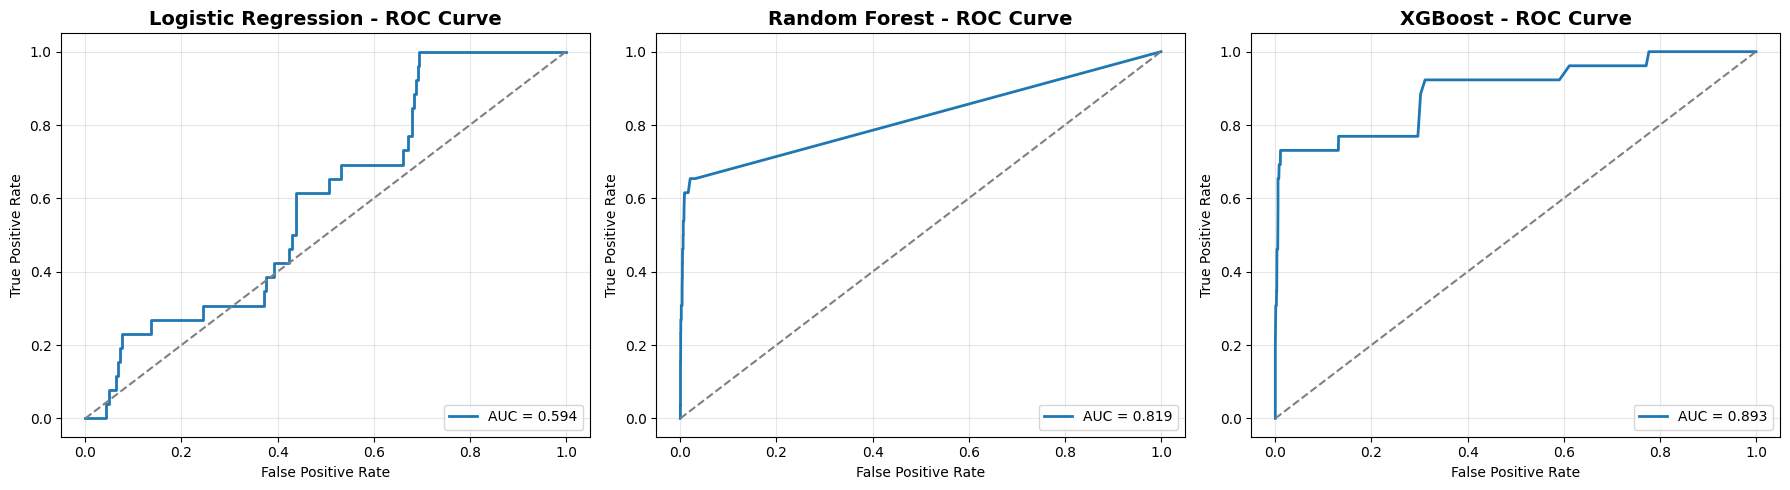

In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Number of models
n_models = len(models)
fig, axes = plt.subplots(1, n_models, figsize=(6 * n_models, 5))

for ax, (name, model) in zip(axes, models.items()):
    # Predicted probabilities for class 1
    y_proba = model.predict_proba(X_test)[:,1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot
    ax.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.3f}")
    ax.plot([0,1], [0,1], color='gray', linestyle='--')
    ax.set_title(f"{name} - ROC Curve", fontsize=14, weight='bold')
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/content/sample_data/roc_curves.png', dpi=300)
plt.show()

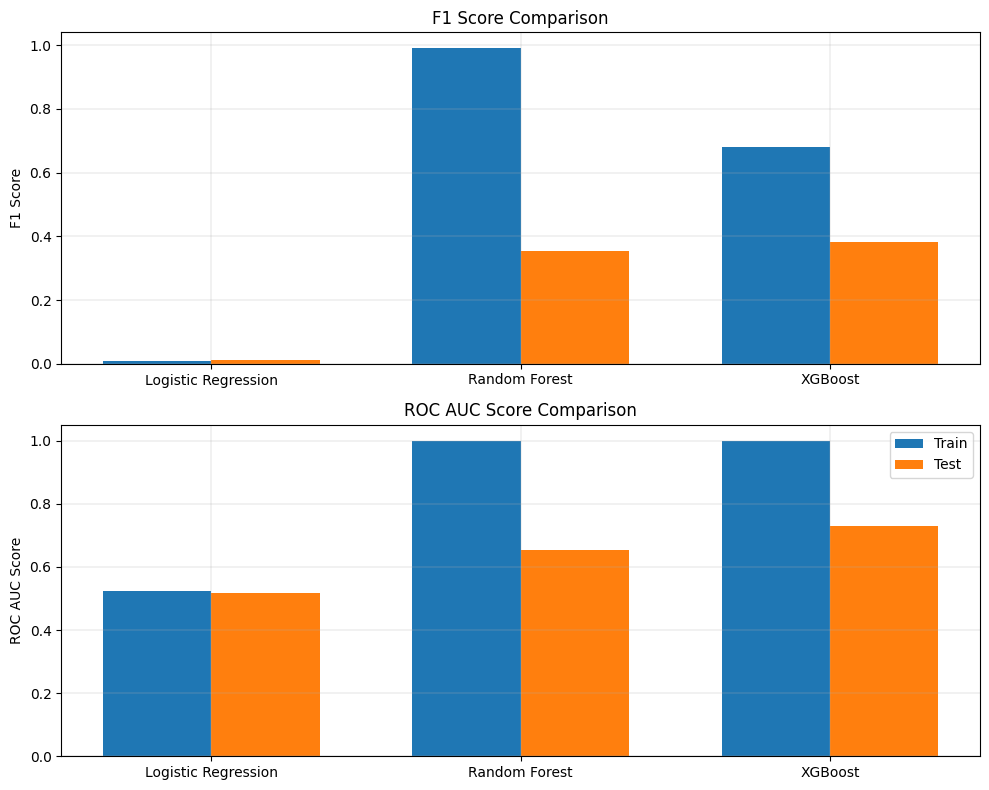

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score

# Define models
models = {
    "Logistic Regression": log_reg_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Store metrics
model_names = []
f1_train_scores, f1_test_scores = [], []
roc_train_scores, roc_test_scores = [], []

for name, model in models.items():
    # Predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Compute metrics
    f1_train = f1_score(y_train, train_preds)
    f1_test = f1_score(y_test, test_preds)
    roc_train = roc_auc_score(y_train, train_preds)
    roc_test = roc_auc_score(y_test, test_preds)

    # Append to lists for plotting
    model_names.append(name)
    f1_train_scores.append(f1_train)
    f1_test_scores.append(f1_test)
    roc_train_scores.append(roc_train)
    roc_test_scores.append(roc_test)


# Plotting
train_metrics = [f1_train_scores, roc_train_scores]
test_metrics  = [f1_test_scores,  roc_test_scores]
metric_names  = ['F1 Score', 'ROC AUC Score']

plt.figure(figsize=(10, 8))
x = np.arange(len(model_names))
width = 0.35

for i, metric in enumerate(metric_names):
    plt.subplot(2, 1, i + 1)
    plt.bar(x - width/2, train_metrics[i], width, label='Train')
    plt.bar(x + width/2, test_metrics[i], width, label='Test')

    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')
    plt.xticks(x, model_names)
    plt.grid(True, linewidth=0.25)

plt.tight_layout()
plt.legend()
plt.show()



---

### **Conclusion on Fraud Detection Models**

Based on the evaluation of the models on the test set:

1. **Logistic Regression**

* Achieved high precision for the majority class (0.995) but extremely low precision and F1 for the minority (fraudulent) class (0.0052 / 0.0103).
* Accuracy is 57%, but this is misleading due to the imbalanced dataset.
* Conclusion: Logistic Regression fails to detect fraudulent transactions effectively.

2. **Random Forest**

* Achieved very high overall accuracy (99.46%) and strong performance on the majority class.
* For the minority class, recall is low (0.3077) and F1-score moderate (0.3556), showing it detects some fraud cases but not consistently.
* Conclusion: Random Forest performs much better than Logistic Regression and captures some fraudulent cases, but still struggles with the minority class.

3. **XGBoost**

* Overall accuracy is 99.27%.
* Minority class recall is 0.4615 with an F1-score of 0.3810, better than both Logistic Regression and Random Forest for detecting fraud.
* Conclusion: XGBoost balances overall performance with better fraud detection, making it the **best model** among the three for this dataset.

**Overall Recommendation:**

* **XGBoost** is the preferred model for detecting fraudulent transactions, as it provides the best trade-off between detecting fraud (minority class) and maintaining high accuracy on the majority class.
* Further improvement could include **oversampling techniques (SMOTE)**, **feature engineering**, or **hyperparameter tuning** to improve minority class detection.

---
